<a href="https://colab.research.google.com/github/fjrsales/tecnicasComputacionais/blob/main_2022.1/int0040_aula_03_NC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução / Revisão - Python

## Arquivos e Strings - Representações frequentes

## Padrão 1. Arquivos do tipo valores separados por vírgula [ponto e vírgula, 'pipes', tabulações...]

Arquivos separados por vírgula são muito utilizados quando desejamos armazenar valores de uma forma estruturada como, por exemplo, em tabelas. Essa modalidade de arquivo facilita a legibilidade e é facilmente importada em programas de manipulação de tabelas como o [Microsoft Excel](https://www.office.com/launch/excel) ou o [Google Planilhas](https://https://docs.google.com/spreadsheets/u/0/).

In [ ]:
import os
os.listdir('sample_data')

['README.md',
 'anscombe.json',
 'mnist_test.csv',
 'california_housing_train.csv',
 'california_housing_test.csv',
 'mnist_train_small.csv']

#### Leitura de arquivos -- função [open](https://docs.python.org/3/library/functions.html#open)

In [ ]:
file = '/content/sample_data/california_housing_test.csv'
with open(file,'r') as f:
  temp = f.read()
  print(f.readline())

In [ ]:
# file = './sample_data/california_housing_train.csv'
file = '/content/sample_data/california_housing_test.csv'
with open(file,'r') as f:
  # Lendo o arquivo inteiro
  #temp = f.read() ## atinjo o final do arquivo
  # print(f.read())
  # Leitura linha a linha
  # line = f.readline()
  while True:
    s = f.readline()
    if(s == ''):
      break
    print(s)
  #print(line)


"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"

-122.050000,37.370000,27.000000,3885.000000,661.000000,1537.000000,606.000000,6.608500,344700.000000

-118.300000,34.260000,43.000000,1510.000000,310.000000,809.000000,277.000000,3.599000,176500.000000

-117.810000,33.780000,27.000000,3589.000000,507.000000,1484.000000,495.000000,5.793400,270500.000000

-118.360000,33.820000,28.000000,67.000000,15.000000,49.000000,11.000000,6.135900,330000.000000

-119.670000,36.330000,19.000000,1241.000000,244.000000,850.000000,237.000000,2.937500,81700.000000

-119.560000,36.510000,37.000000,1018.000000,213.000000,663.000000,204.000000,1.663500,67000.000000

-121.430000,38.630000,43.000000,1009.000000,225.000000,604.000000,218.000000,1.664100,67000.000000

-120.650000,35.480000,19.000000,2310.000000,471.000000,1341.000000,441.000000,3.225000,166900.000000

-122.840000,38.400000,15.000000,3080.000000,617.000000,144

#### Ex. 1: Determine o número de linhas e colunas dos dados e apresente os nomes das variáveis das colunas


#### Abordagem 1 - Leitura linha a linha

In [ ]:
file = '/content/sample_data/california_housing_train.csv'
with open(file,'r') as f:
  lines = []
  buffer = f.readline()
  header = buffer
  while(buffer != ''):
    lines.append(buffer)
    buffer = f.readline()
  columns = header.replace("\"","").split(",")
  print('Foram lidas {} linhas com {} colunas cada.'.format(len(lines),len(columns)))  

Foram lidas 17001 linhas com 9 colunas cada.


#### Abordagem 2 - Ler o arquivo todo segmentado por linhas

In [ ]:
file = '/content/sample_data/california_housing_train.csv'
with open(file,'r') as f:
  lines = []
  buffer = f.readlines()
  print(buffer)
  header = buffer[0]
  columns = header.replace("\"","").split(",")
  print('Foram lidas {} linhas com {} colunas cada.'.format(len(buffer),len(columns)))  

['"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"\n', '-114.310000,34.190000,15.000000,5612.000000,1283.000000,1015.000000,472.000000,1.493600,66900.000000\n', '-114.470000,34.400000,19.000000,7650.000000,1901.000000,1129.000000,463.000000,1.820000,80100.000000\n', '-114.560000,33.690000,17.000000,720.000000,174.000000,333.000000,117.000000,1.650900,85700.000000\n', '-114.570000,33.640000,14.000000,1501.000000,337.000000,515.000000,226.000000,3.191700,73400.000000\n', '-114.570000,33.570000,20.000000,1454.000000,326.000000,624.000000,262.000000,1.925000,65500.000000\n', '-114.580000,33.630000,29.000000,1387.000000,236.000000,671.000000,239.000000,3.343800,74000.000000\n', '-114.580000,33.610000,25.000000,2907.000000,680.000000,1841.000000,633.000000,2.676800,82400.000000\n', '-114.590000,34.830000,41.000000,812.000000,168.000000,375.000000,158.000000,1.708300,48500.000000\n', '-114.590000,33.61000

### Abordagem 3 - Ler blocos de dados de tamanho fixo

In [ ]:
CHUNK_SIZE = 1000
file = '/content/sample_data/california_housing_train.csv'
with open(file,'r') as f:
  buffer = f.read(CHUNK_SIZE)
  #while(buffer != ""):
  while True:
    if(buffer == ""):
      print('EOF reaached')
      break
    print(buffer)
    buffer = f.read(CHUNK_SIZE)

  
  #columns = header.replace("\"","").split(",")
  #print('Foram lidas {} linhas com {} colunas cada.'.format(len(buffer),len(columns)))  

A saída de streaming foi truncada nas últimas 5000 linhas.
-121.600000,39.750000,19.000000,2888.000000,591.000000,984.000000,499.000000,1.976600,92600.000000
-121.600000,39.680000,15.000000,1677.000000,345.000000,844.000000,330.000000,2.395800,111200.000000
-121.600000,39.150000,19.000000,1396.000000,336.000000,940.000000,309.000000,1.520800,70300.000000
-121.600000,39.120000,21.000000,1299.000000,338.000000,1494.000000,311.000000,1.334800,225000.000000
-121.600000,37.910000,13.000000,2479.000000,394.000000,1075.000000,350.000000,5.101700,241400.000000
-121
.600000,37.130000,14.000000,9483.000000,1361.000000,4108.000000,1281.000000,7.500000,344500.000000
-121.600000,37.090000,24.000000,1511.000000,318.000000,1052.000000,292.000000,3.625000,350000.000000
-121.600000,36.880000,21.000000,3416.000000,624.000000,1862.000000,595.000000,4.781300,241500.000000
-121.600000,36.810000,18.000000,1575.000000,230.000000,751.000000,219.000000,5.220300,286500.000000
-121.610000,39.770000,25.000000,161

### O que podemos afirmar sobre as abordagens que observamos? 
- E se os arquivos não fossem de texto? 
- E se quiséssemos extrair estatísticas dos dados? Como deveríamos proceder?

### Pandas - Python for Data Analysis
Referências: [página principal](https://pandas.pydata.org/) | [documentação](https://pandas.pydata.org/docs/) | [stack overflow survey 2021](https://insights.stackoverflow.com/survey/2021#worked-with-vs-want-to-work-with-misc-tech-worked-want)

#### Estrutura de referência - DataFrame

O DataFrame é uma "planilha" com "superpoderes", isto é, temos uma série de funções e recursos disponíveis para analisar dados, inclusive com recursos para operações de leitura e escrita (I/O).

In [ ]:
import pandas as pd

df = pd.read_csv(file)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


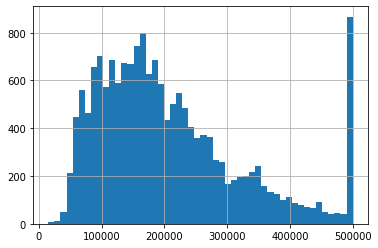

In [ ]:
df.median_house_value.hist(bins = 50)

## Padrão 2 - Arquivos com marcação
- [HTML (Hyper Text Markup Language)](https://www.w3schools.com/html/html_examples.asp)

```html
<!DOCTYPE html>
<html>
<body>

<h2>Grouping Form Data with Fieldset</h2>

<p>The fieldset element is used to group related data in a form, and the legend element defines a caption for the fieldset element.</p>

<form action="/action_page.php">
  <fieldset>
    <legend>Personalia:</legend>
    <label for="fname">First name:</label><br>
    <input type="text" id="fname" name="fname" value="John"><br>
    <label for="lname">Last name:</label><br>
    <input type="text" id="lname" name="lname" value="Doe"><br><br>
    <input type="submit" value="Submit">
  </fieldset>
</form>

</body>
</html>
```

In [ ]:
%%html
<!DOCTYPE html>
<html>
<body>

<h2>Grouping Form Data with Fieldset</h2>

<p>The fieldset element is used to group related data in a form, and the legend element defines a caption for the fieldset element.</p>

<form action="/action_page.php">
  <fieldset>
    <legend>Personalia:</legend>
    <label for="fname">First name:</label><br>
    <input type="text" id="fname" name="fname" value="John"><br>
    <label for="lname">Last name:</label><br>
    <input type="text" id="lname" name="lname" value="Doe"><br><br>
    <input type="submit" value="Submit">
  </fieldset>
</form>

</body>
</html>

- [XML (eXtensible Markup Language)](https://www.w3schools.com/xml/xml_examples.asp)

```xml
<?xml version="1.0" encoding="UTF-8"?>
<breakfast_menu>
<food>
    <name>Belgian Waffles</name>
    <price>$5.95</price>
    <description>
   Two of our famous Belgian Waffles with plenty of real maple syrup
   </description>
    <calories>650</calories>
</food>
<food>
    <name>Strawberry Belgian Waffles</name>
    <price>$7.95</price>
    <description>
    Light Belgian waffles covered with strawberries and whipped cream
    </description>
    <calories>900</calories>
</food>
<food>
    <name>Berry-Berry Belgian Waffles</name>
    <price>$8.95</price>
    <description>
    Belgian waffles covered with assorted fresh berries and whipped cream
    </description>
    <calories>900</calories>
</food>
<food>
    <name>French Toast</name>
    <price>$4.50</price>
    <description>
    Thick slices made from our homemade sourdough bread
    </description>
    <calories>600</calories>
</food>
<food>
    <name>Homestyle Breakfast</name>
    <price>$6.95</price>
    <description>
    Two eggs, bacon or sausage, toast, and our ever-popular hash browns
    </description>
    <calories>950</calories>
</food>
</breakfast_menu>

```


- [JSON (JavaScript Object Notation)](https://www.w3schools.com/js/js_json.asp)

Muito utilizado para intercâmbio de informações na internet. Tornou-se um padrão para troca de mensagens entre sistemas.

```javascript
"employees":[
  {"firstName":"John", "lastName":"Doe"},
  {"firstName":"Anna", "lastName":"Smith"},
  {"firstName":"Peter", "lastName":"Jones"}
]
```

### Manipulação desses arquivos em python

- Iremos iniciar trabalhando com arquivos JSON e XML, falaremos sobre HTML mais a frente quando falarmos sobre sistemas web.

In [ ]:
base = '<?xml version="1.0" encoding="UTF-8"?><breakfast_menu><food><name>Belgian Waffles</name><price>$5.95</price><description>Two of our famous Belgian Waffles with plenty of real maple syrup</description><calories>650</calories></food><food><name>Strawberry Belgian Waffles</name><price>$7.95</price><description>Light Belgian waffles covered with strawberries and whipped cream</description><calories>900</calories></food><food><name>Berry-Berry Belgian Waffles</name><price>$8.95</price><description>Belgian waffles covered with assorted fresh berries and whipped cream</description><calories>900</calories></food><food><name>French Toast</name><price>$4.50</price><description>Thick slices made from our homemade sourdough bread</description><calories>600</calories></food><food><name>Homestyle Breakfast</name><price>$6.95</price><description>Two eggs, bacon or sausage, toast, and our ever-popular hash browns</description><calories>950</calories></food></breakfast_menu>'


In [ ]:
print(base)

<?xml version="1.0" encoding="UTF-8"?><breakfast_menu><food><name>Belgian Waffles</name><price>$5.95</price><description>Two of our famous Belgian Waffles with plenty of real maple syrup</description><calories>650</calories></food><food><name>Strawberry Belgian Waffles</name><price>$7.95</price><description>Light Belgian waffles covered with strawberries and whipped cream</description><calories>900</calories></food><food><name>Berry-Berry Belgian Waffles</name><price>$8.95</price><description>Belgian waffles covered with assorted fresh berries and whipped cream</description><calories>900</calories></food><food><name>French Toast</name><price>$4.50</price><description>Thick slices made from our homemade sourdough bread</description><calories>600</calories></food><food><name>Homestyle Breakfast</name><price>$6.95</price><description>Two eggs, bacon or sausage, toast, and our ever-popular hash browns</description><calories>950</calories></food></breakfast_menu>


- breakfast_menu
  - food
    - name
    - price
    - description
    - calories

#### Vamos tentar extrair as informações do XML usando [expressões regulares (REGEX)](https://docs.python.org/3/library/re.html)

In [ ]:
import re

1. Como buscar os nomes das tags?

 lambda x:x.replace("/","")

In [ ]:
for tag in tags:
  tag = tag.replace("/","")

In [ ]:
o = re.compile(r'(?<=<)(.*?)(?=>)')
tags = o.findall(base) #candidatas a tags com repetição
print(tags)

# map(function,lista) --> para cada item da lista, aplicar function(item)
# lambda function --> lambda x:x.replace()
tags = map(lambda x:x.replace("/",""),tags) #aplicar a função replace em cada candidata
print(tags)

# extrair duplicatas? set(iterable) --> elementos sem repetição
tags = set(tags)
print(tags)

['?xml version="1.0" encoding="UTF-8"?', 'breakfast_menu', 'food', 'name', '/name', 'price', '/price', 'description', '/description', 'calories', '/calories', '/food', 'food', 'name', '/name', 'price', '/price', 'description', '/description', 'calories', '/calories', '/food', 'food', 'name', '/name', 'price', '/price', 'description', '/description', 'calories', '/calories', '/food', 'food', 'name', '/name', 'price', '/price', 'description', '/description', 'calories', '/calories', '/food', 'food', 'name', '/name', 'price', '/price', 'description', '/description', 'calories', '/calories', '/food', '/breakfast_menu']
{'price', 'breakfast_menu', 'name', 'food', 'description', '?xml version="1.0" encoding="UTF-8"?', 'calories'}


Tivemos seis candidatas a tags:{'price', 'food', 'breakfast_menu', 'calories', 'description', '?xml version="1.0" encoding="UTF-8"?', 'name'}

Dessas, temos interesse em:
- name
- price 
- description
- calories

Então, vamos aplicar regex específicas para os conteúdos das tags de interesse para recuperarmos os valores.

-- Lista de nomes

In [ ]:
p = re.compile(r'(?<=<name>)(.*?)(?=</name>)')
names = p.findall(base)
print(names)

['Belgian Waffles', 'Strawberry Belgian Waffles', 'Berry-Berry Belgian Waffles', 'French Toast', 'Homestyle Breakfast']


-- Lista de preços

In [ ]:
q = re.compile(r'(?<=<price>)(.*?)(?=</price>)')
prices = q.findall(base)
print(prices)

['$5.95', '$7.95', '$8.95', '$4.50', '$6.95']


In [ ]:
r = re.compile(r'(?<=<description>)(.*?)(?=</description>)')
descriptions = r.findall(base)
print(descriptions)

['Two of our famous Belgian Waffles with plenty of real maple syrup', 'Light Belgian waffles covered with strawberries and whipped cream', 'Belgian waffles covered with assorted fresh berries and whipped cream', 'Thick slices made from our homemade sourdough bread', 'Two eggs, bacon or sausage, toast, and our ever-popular hash browns']


In [ ]:
s = re.compile(r'(?<=<calories>)(.*?)(?=</calories>)')
calories = s.findall(base)

In [ ]:
foods = []
for name,price,desc,cals in zip(names,prices,descriptions,calories):
  item = {
      'name':name,
      'price':price,
      'description':desc,
      'calories':cals
  }
  foods.append(item)
print(foods)

[{'name': 'Belgian Waffles', 'price': '$5.95', 'description': 'Two of our famous Belgian Waffles with plenty of real maple syrup', 'calories': '650'}, {'name': 'Strawberry Belgian Waffles', 'price': '$7.95', 'description': 'Light Belgian waffles covered with strawberries and whipped cream', 'calories': '900'}, {'name': 'Berry-Berry Belgian Waffles', 'price': '$8.95', 'description': 'Belgian waffles covered with assorted fresh berries and whipped cream', 'calories': '900'}, {'name': 'French Toast', 'price': '$4.50', 'description': 'Thick slices made from our homemade sourdough bread', 'calories': '600'}, {'name': 'Homestyle Breakfast', 'price': '$6.95', 'description': 'Two eggs, bacon or sausage, toast, and our ever-popular hash browns', 'calories': '950'}]


### JSON - JavaScript Object Notation --> Web

# Desafio - Preparar um script que converte textos no formato a seguir em um arquivo JSON onde os dados referentes às instituições.

Exemplo:
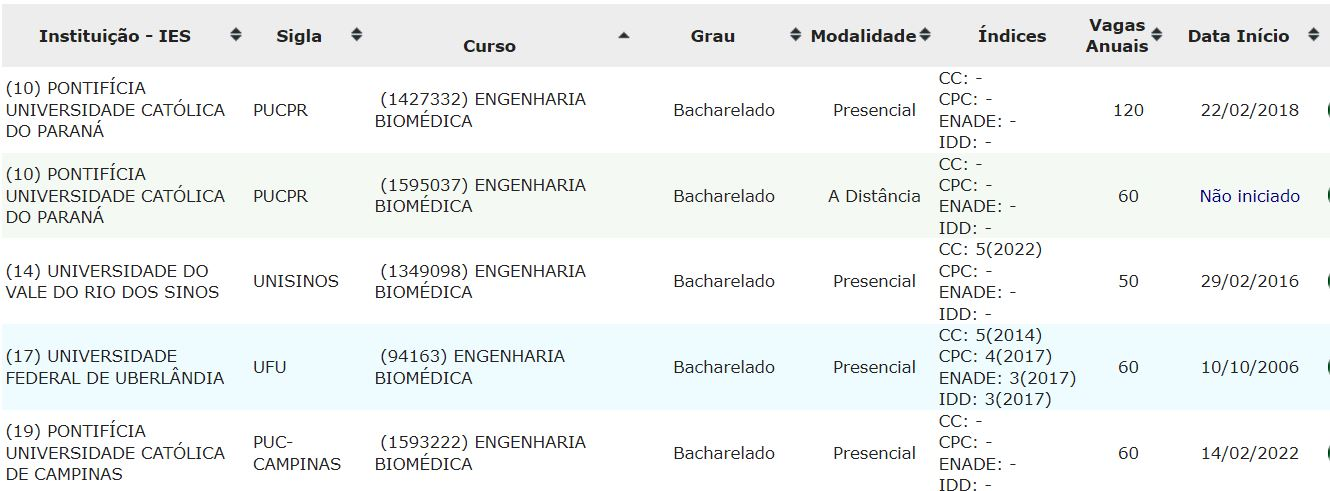
```
A saída considerando as três primeiras instâncias é:

output = {
  "curso_01" = {
  "ies_nome" : "PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ",
  "ies_id" : 10,
  "sigla" : "PUCPR",
  "curso" : "ENGENHARIA BIOMÉDICA",
  "curso_id" : "1427332",
  "grau" : "Bacharelado",
  "modalidade" : "Presencial",
  "cc": "-",
  "ano_cc": "-",
  "cpc" : "-",
  "ano_cpc" : "-",
  "enade": "-",
  "ano_enade": "-",
  "idd": "-",
  "vagas_ano": 120,
  "inicio":	"22/02/2018"
  },
  "curso_02" = {
  "ies_nome" : "PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ",
  "ies_id" : 10,
  "sigla" : "PUCPR",
  "curso" : "ENGENHARIA BIOMÉDICA",
  "curso_id" : "1595037",
  "grau" : "Bacharelado",
  "modalidade" : "A Distância",
  "cc": "-",
  "ano_cc": "-",
  "cpc" : "-",
  "ano_cpc" : "-",
  "enade": "-",
  "ano_enade": "-",
  "idd": "-",
  "vagas_ano": 60,
  "inicio":	"Não iniciado"
  }
  "curso_03" = {
  "ies_nome" : "UNIVERSIDADE DO VALE DO RIO DOS SINOS",
  "ies_id" : 14,
  "sigla" : "UNISINOS",
  "curso" : "ENGENHARIA BIOMÉDICA",
  "curso_id" : "1349098",
  "grau" : "Bacharelado",
  "modalidade" : "Presencial",
  "cc": 5,
  "ano_cc": 2022,
  "cpc" : "-",
  "ano_cpc" : "-",
  "enade": "-",
  "ano_enade": "-",
  "idd": "-",
  "vagas_ano": 50,
  "inicio":	"29/02/2016"
  }
}
```

Após salvar o arquivo JSON, carregue-o num DataFrame do Pandas e faça um conjunto de análises descritivas sobre os cursos em questão:
- Total de vagas por ano e por modalidade;
- Total de vagas por estado e por região;
- Distribuição de cursos por estado, região e modalidade;
- Quantidade de vagas ofertadas por ano numa série histórica;
- Quantidade de vagas autorizadas e não iniciadas;
- Distribuição dos índices dos cursos;

## Importação do Colab e das bibliotecas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import re
import json  
import pandas as pd
import matplotlib.pyplot as plt 

## Leitura do arquivo TXT

In [ ]:
arquivo_txt = '/content/drive/MyDrive/Tecnicas_Computacionais/arquivo_tarefa_aula_03.txt'

In [ ]:
file = open(arquivo_txt)
x = file.readlines()

In [ ]:
len(x)

231

In [ ]:
x[226]

' (22736) Faculdade UNISUL de Itajaí \t-\t (1504818) ENGENHARIA BIOMÉDICA\tBacharelado\tPresencial\tCC: 4(2021)\n'

## Formação do JSON

In [ ]:
inicio = 1
fim = 6
for i in range(inicio,len(x),5):
  print(x[inicio:fim])
  inicio = fim
  fim = fim + 5
  print(inicio,fim,len(x))

['(10) PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ\tPUCPR\t (1427332) ENGENHARIA BIOMÉDICA\tBacharelado\tPresencial\tCC: -\n', 'CPC: -\n', 'ENADE: -\n', 'IDD: -\n', '120\t22/02/2018\t\tVisualizar Detalhes do Curso\n']
6 11 231
['(10) PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ\tPUCPR\t (1595037) ENGENHARIA BIOMÉDICA\tBacharelado\tA Distância\tCC: -\n', 'CPC: -\n', 'ENADE: -\n', 'IDD: -\n', '60\tNão iniciado\t\tVisualizar Detalhes do Curso\n']
11 16 231
['(14) UNIVERSIDADE DO VALE DO RIO DOS SINOS\tUNISINOS\t (1349098) ENGENHARIA BIOMÉDICA\tBacharelado\tPresencial\tCC: 5(2022)\n', 'CPC: -\n', 'ENADE: -\n', 'IDD: -\n', '50\t29/02/2016\t\tVisualizar Detalhes do Curso\n']
16 21 231
['(17) UNIVERSIDADE FEDERAL DE UBERLÂNDIA\tUFU\t (94163) ENGENHARIA BIOMÉDICA\tBacharelado\tPresencial\tCC: 5(2014)\n', 'CPC: 4(2017)\n', 'ENADE: 3(2017)\n', 'IDD: 3(2017)\n', '60\t10/10/2006\t\tVisualizar Detalhes do Curso\n']
21 26 231
['(19) PONTIFÍCIA UNIVERSIDADE CATÓLICA DE CAMPINAS\tPUC-CAMPINAS\t (1593222)

In [ ]:
def ler_linhas(inicio,fim,arquivo):
  return arquivo[inicio:fim]

In [ ]:
inicio = 1
fim = 6
dicionario = {}
nome_inicio = 'curso_'
contador_curso = 1
for i in range(inicio,len(x),5):
  z = ler_linhas(inicio,fim,x)
  registro = {}
  registro['ies_nome'] = z[0].split('\t')[0].split(') ')[1] 
  registro['ies_id'] = int(re.search('\((\d+)\)',z[0].split('\t')[0])[1]) if re.search('\((\d+)\)',z[0].split('\t')[0]) != None else '-'
  registro['sigla'] = z[0].split('\t')[1].replace(' ','')
  registro['curso'] = z[0].split('\t')[2].split(') ')[1]
  registro['curso_id'] = int(re.search('\((\d+)\)',z[0].split('\t')[2])[1]) if re.search('\((\d+)\)',z[0].split('\t')[2]) != None else '-'
  registro['grau'] = z[0].split('\t')[3]
  registro['modalidade'] = z[0].split('\t')[4]
  registro['cc'] = int(re.search('(\d*?)\(',z[0].split('\t')[5])[1]) if re.search('(\d*?)\(',z[0].split('\t')[5]) != None else '-'
  registro['ano_cc'] = int(re.search('\((\d+)\)',z[0].split('\t')[5])[1]) if re.search('\((\d+)\)',z[0].split('\t')[5]) != None else '-'
  registro['cpc'] = int(re.search('(\d*?)\(',z[1].split('\t')[0])[1]) if re.search('(\d*?)\(',z[1].split('\t')[0]) != None else '-'
  registro['ano_cpc'] = int(re.search('\((\d+)\)',z[1].split('\t')[0])[1]) if re.search('\((\d+)\)',z[1].split('\t')[0]) != None else '-'
  registro['enade'] = int(re.search('( \d*?)\(',z[2].split('\t')[0])[1]) if re.search('( \d*?)\(',z[2].split('\t')[0]) != None else '-'
  registro['ano_enade'] = int(re.search('\((\d+)\)',z[2].split('\t')[0])[1]) if re.search('\((\d+)\)',z[2].split('\t')[0]) != None else '-'
  registro['idd'] = int(re.search('( \d*?)\(',z[3].split('\t')[0])[1]) if re.search('( \d*?)\(',z[3].split('\t')[0]) != None else '-'
  registro['ano_idd'] = int(re.search('\((\d+)\)',z[3].split('\t')[0])[1]) if re.search('\((\d+)\)',z[3].split('\t')[0]) != None else '-'
  registro['vagas_ano'] = int(z[4].split('\t')[0])
  registro['inicio'] = z[4].split('\t')[1]
  dicionario[nome_inicio+str(contador_curso)] = registro
  contador_curso += 1
  inicio = fim
  fim = fim + 5


In [ ]:
print(dicionario)

{'curso_1': {'ies_nome': 'PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ', 'ies_id': 10, 'sigla': 'PUCPR', 'curso': 'ENGENHARIA BIOMÉDICA', 'curso_id': 1427332, 'grau': 'Bacharelado', 'modalidade': 'Presencial', 'cc': '-', 'ano_cc': '-', 'cpc': '-', 'ano_cpc': '-', 'enade': '-', 'ano_enade': '-', 'idd': '-', 'ano_idd': '-', 'vagas_ano': 120, 'inicio': '22/02/2018'}, 'curso_2': {'ies_nome': 'PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ', 'ies_id': 10, 'sigla': 'PUCPR', 'curso': 'ENGENHARIA BIOMÉDICA', 'curso_id': 1595037, 'grau': 'Bacharelado', 'modalidade': 'A Distância', 'cc': '-', 'ano_cc': '-', 'cpc': '-', 'ano_cpc': '-', 'enade': '-', 'ano_enade': '-', 'idd': '-', 'ano_idd': '-', 'vagas_ano': 60, 'inicio': 'Não iniciado'}, 'curso_3': {'ies_nome': 'UNIVERSIDADE DO VALE DO RIO DOS SINOS', 'ies_id': 14, 'sigla': 'UNISINOS', 'curso': 'ENGENHARIA BIOMÉDICA', 'curso_id': 1349098, 'grau': 'Bacharelado', 'modalidade': 'Presencial', 'cc': 5, 'ano_cc': 2022, 'cpc': '-', 'ano_cpc': '-', 'enade': '-

In [ ]:
json_object = json.dumps(dicionario, indent = 4,ensure_ascii=False)
with open("/content/drive/MyDrive/Tecnicas_Computacionais/cursos.json", "w") as outfile: 
    outfile.write(json_object) 

## Leitura do JSON em dataframe

In [ ]:
with open("/content/drive/MyDrive/Tecnicas_Computacionais/cursos.json", 'r') as openfile: 
    data = json.load(openfile) 
df = pd.DataFrame(data).transpose()


In [ ]:
df.head()

,ies_nome,ies_id,sigla,curso,curso_id,grau,modalidade,cc,ano_cc,cpc,ano_cpc,enade,ano_enade,idd,ano_idd,vagas_ano,inicio
curso_1,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,10,PUCPR,ENGENHARIA BIOMÉDICA,1427332,Bacharelado,Presencial,-,-,-,-,-,-,-,-,120,22/02/2018
curso_2,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,10,PUCPR,ENGENHARIA BIOMÉDICA,1595037,Bacharelado,A Distância,-,-,-,-,-,-,-,-,60,Não iniciado
curso_3,UNIVERSIDADE DO VALE DO RIO DOS SINOS,14,UNISINOS,ENGENHARIA BIOMÉDICA,1349098,Bacharelado,Presencial,5,2022,-,-,-,-,-,-,50,29/02/2016
curso_4,UNIVERSIDADE FEDERAL DE UBERLÂNDIA,17,UFU,ENGENHARIA BIOMÉDICA,94163,Bacharelado,Presencial,5,2014,4,2017,3,2017,3,2017,60,10/10/2006
curso_5,PONTIFÍCIA UNIVERSIDADE CATÓLICA DE CAMPINAS,19,PUC-CAMPINAS,ENGENHARIA BIOMÉDICA,1593222,Bacharelado,Presencial,-,-,-,-,-,-,-,-,60,14/02/2022


## Dados do dataframe

### Total de vagas por ano e por modalidade

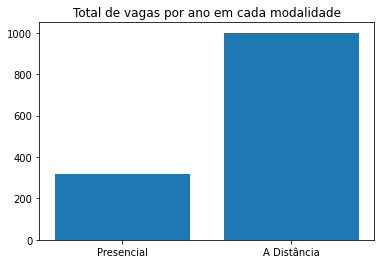

In [ ]:
modalidade = df['modalidade']
vagas = df['vagas_ano']
plt.bar(modalidade,vagas)
plt.title('Total de vagas por ano em cada modalidade')
plt.show()

### Total de vagas por estado e por região

### Distribuição de cursos por estado, região e modalidade


### Quantidade de vagas ofertadas por ano numa série histórica

### Quantidade de vagas autorizadas e não iniciadas

In [ ]:
df['inicio'] = df['inicio'].str.contains('Não iniciado')
df['inicio'] = df['inicio'].replace(True,'Não Iniciado')
df['inicio'] = df['inicio'].replace(False,'Autorizado')

In [ ]:
df['inicio'].value_counts()

Autorizado      25
Não Iniciado    14
Name: inicio, dtype: int64

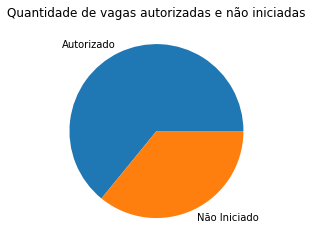

In [ ]:
autorizado = df['inicio']
plt.pie(autorizado.value_counts(),labels=['Autorizado','Não Iniciado']) 
plt.title('Quantidade de vagas autorizadas e não iniciadas')
plt.show()

### Distribuição dos índices dos cursos

### TXT no python

In [ ]:
emec = """Instituição - IES	Sigla	Curso	Grau	Modalidade	Índices	Vagas Anuais	Data Início		
(10) PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ	PUCPR	 (1427332) ENGENHARIA BIOMÉDICA	Bacharelado	Presencial	CC: -
CPC: -
ENADE: -
IDD: -
120	22/02/2018		Visualizar Detalhes do Curso
(10) PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ	PUCPR	 (1595037) ENGENHARIA BIOMÉDICA	Bacharelado	A Distância	CC: -
CPC: -
ENADE: -
IDD: -
60	Não iniciado		Visualizar Detalhes do Curso
(14) UNIVERSIDADE DO VALE DO RIO DOS SINOS	UNISINOS	 (1349098) ENGENHARIA BIOMÉDICA	Bacharelado	Presencial	CC: 5(2022)
CPC: -
ENADE: -
IDD: -
50	29/02/2016		Visualizar Detalhes do Curso
(17) UNIVERSIDADE FEDERAL DE UBERLÂNDIA	UFU	 (94163) ENGENHARIA BIOMÉDICA	Bacharelado	Presencial	CC: 5(2014)
CPC: 4(2017)
ENADE: 3(2017)
IDD: 3(2017)
60	10/10/2006		Visualizar Detalhes do Curso
(19) PONTIFÍCIA UNIVERSIDADE CATÓLICA DE CAMPINAS	PUC-CAMPINAS	 (1593222) ENGENHARIA BIOMÉDICA	Bacharelado	Presencial	CC: -
CPC: -
ENADE: -
IDD: -
60	14/02/2022		Visualizar Detalhes do Curso
 (23) UNIVERSIDADE FEEVALE	FEEVALE	 (1473045) ENGENHARIA BIOMÉDICA	Bacharelado	Presencial	CC: -
CPC: -
ENADE: -
IDD: -
85	21/02/2019		Visualizar Detalhes do Curso
(82) UNIVERSIDADE DO OESTE DE SANTA CATARINA	UNOESC	 (1562645) ENGENHARIA BIOMÉDICA	Bacharelado	Presencial	CC: -
CPC: -
ENADE: -
IDD: -
40	Não iniciado		Visualizar Detalhes do Curso
(82) UNIVERSIDADE DO OESTE DE SANTA CATARINA	UNOESC	 (1562656) ENGENHARIA BIOMÉDICA	Bacharelado	Presencial	CC: -
CPC: -
ENADE: -
IDD: -
40	Não iniciado		Visualizar Detalhes do Curso
(107) UNIVERSIDADE FEDERAL DE SÃO JOÃO DEL REI	UFSJ	 (1276564) ENGENHARIA BIOMÉDICA	Bacharelado	Presencial	CC: -
CPC: -
ENADE: -
IDD: -
40	Não iniciado		Visualizar Detalhes do Curso
(126) INSTITUTO NACIONAL DE TELECOMUNICAÇÕES	INATEL	 (1029350) ENGENHARIA BIOMÉDICA	Bacharelado	Presencial	CC: 4(2013)
CPC: 3(2017)
ENADE: 3(2017)
IDD: 3(2017)
120	15/03/2010		Visualizar Detalhes do Curso
(203) UNIVERSIDADE SÃO JUDAS TADEU	USJT	 (1522733) ENGENHARIA BIOMÉDICA	Bacharelado	Presencial	CC: -
CPC: -
ENADE: -
IDD: -
50	24/03/2020		Visualizar Detalhes do Curso
(203) UNIVERSIDADE SÃO JUDAS TADEU	USJT	 (1596594) ENGENHARIA BIOMÉDICA	Bacharelado	A Distância	CC: -
CPC: -
ENADE: -
IDD: -
200	Não iniciado		Visualizar Detalhes do Curso
(275) UNIVERSIDADE DO VALE DO PARAÍBA	UNIVAP	 (49940) ENGENHARIA BIOMÉDICA	Bacharelado	Presencial	CC: 4(2015)
CPC: 4(2017)
ENADE: 3(2017)
IDD: 3(2017)
60	02/02/2000		Visualizar Detalhes do Curso
 (319) UNIVERSIDADE BRASIL
Sub Judice: Portaria nº 631/2020 publicada no Diário Oficial da União - DOU 23/12/2020.
Em Supervisão - Procedimento Sancionador com Medida Cautelar: Portaria N. 225/2021, publicada no Diário Oficial da União - DOU em 12/03/2021.	UB	 (1458179) ENGENHARIA BIOMÉDICA	Bacharelado	Presencial	CC: -
CPC: -
ENADE: -
IDD: -
100	Não iniciado		Visualizar Detalhes do Curso
(344) CENTRO UNIVERSITÁRIO UNA	UNA	 (1596564) ENGENHARIA BIOMÉDICA	Bacharelado	A Distância	CC: -
CPC: -
ENADE: -
IDD: -
225	19/11/2021		Visualizar Detalhes do Curso
 (426) UNIVERSIDADE FRANCISCANA	 UFN	 (1132766) ENGENHARIA BIOMÉDICA	Bacharelado	Presencial	CC: 3(2015)
CPC: 4(2017)
ENADE: 3(2017)
IDD: 3(2017)
40	28/02/2011		Visualizar Detalhes do Curso
(546) PONTIFÍCIA UNIVERSIDADE CATÓLICA DE SÃO PAULO	PUCSP	 (119846) ENGENHARIA BIOMÉDICA	Bacharelado	Presencial	CC: 4(2013)
CPC: 4(2017)
ENADE: 3(2017)
IDD: 3(2017)
50	09/02/2009		Visualizar Detalhes do Curso
(569) UNIVERSIDADE FEDERAL DO PARÁ	UFPA	 (1191473) ENGENHARIA BIOMÉDICA	Bacharelado	Presencial	CC: 4(2017)
CPC: 4(2017)
ENADE: 4(2017)
IDD: 3(2017)
40	15/04/2013		Visualizar Detalhes do Curso
(570) UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE	UFRN	 (1154794) ENGENHARIA BIOMÉDICA	Bacharelado	Presencial	CC: 4(2015)
CPC: 3(2017)
ENADE: 3(2017)
IDD: 3(2017)
80	08/08/2011		Visualizar Detalhes do Curso
(580) UNIVERSIDADE FEDERAL DE PERNAMBUCO	UFPE	 (58856) ENGENHARIA BIOMÉDICA	Bacharelado	Presencial	CC: 5(2019)
CPC: 4(2017)
ENADE: 4(2017)
IDD: 3(2017)
30	12/07/2001		Visualizar Detalhes do Curso
(591) UNIVERSIDADE FEDERAL DE SÃO PAULO	UNIFESP	 (1313323) ENGENHARIA BIOMÉDICA	Bacharelado	Presencial	CC: 5(2017)
CPC: 4(2017)
ENADE: 4(2017)
IDD: SC
75	07/02/2011		Visualizar Detalhes do Curso
 (712) CENTRO UNIVERSITÁRIO IBMR	-	 (1603208) ENGENHARIA BIOMÉDICA	Bacharelado	Presencial	CC: -
CPC: -
ENADE: -
IDD: -
200	18/05/2022		Visualizar Detalhes do Curso
 (790) Faculdade Israelita de Ciências da Saúde Albert Einstein	 FICSAE	 (1545637) ENGENHARIA BIOMÉDICA	Bacharelado	Presencial	CC: 5(2021)
CPC: -
ENADE: -
IDD: -
70	Não iniciado		Visualizar Detalhes do Curso
 (1041) UNIVERSIDADE DO VALE DO TAQUARI	UNIVATES	 (1445416) ENGENHARIA BIOMÉDICA	Bacharelado	Presencial	CC: -
CPC: -
ENADE: -
IDD: -
50	Não iniciado		Visualizar Detalhes do Curso
(1185) CENTRO UNIVERSITÁRIO JORGE AMADO	UNIJORGE	 (1484004) ENGENHARIA BIOMÉDICA	Bacharelado	Presencial	CC: -
CPC: -
ENADE: -
IDD: -
120	Não iniciado		Visualizar Detalhes do Curso
 (1294) Centro Universitário das Américas	 CAM	 (1304135) ENGENHARIA BIOMÉDICA	Bacharelado	Presencial	CC: 4(2022)
CPC: -
ENADE: -
IDD: -
320	08/08/2016		Visualizar Detalhes do Curso
 (1294) Centro Universitário das Américas	 CAM	 (1515716) ENGENHARIA BIOMÉDICA	Bacharelado	Presencial	CC: -
CPC: -
ENADE: -
IDD: -
320	17/02/2020		Visualizar Detalhes do Curso
 (1294) Centro Universitário das Américas	 CAM	 (1537547) ENGENHARIA BIOMÉDICA	Bacharelado	A Distância	CC: -
CPC: -
ENADE: -
IDD: -
640	03/08/2020		Visualizar Detalhes do Curso
(1310) FACULDADE DE AMERICANA	FAM	 (1349369) ENGENHARIA BIOMÉDICA	Bacharelado	Presencial	CC: -
CPC: -
ENADE: -
IDD: -
150	01/08/2016		Visualizar Detalhes do Curso
 (1351) CENTRO UNIVERSITÁRIO SOCIESC	-	 (1575315) ENGENHARIA BIOMÉDICA	Bacharelado	A Distância	CC: -
CPC: -
ENADE: -
IDD: -
100	Não iniciado		Visualizar Detalhes do Curso
(1409) FACULDADE DO CENTRO LESTE	UCL	 (1164437) ENGENHARIA BIOMÉDICA	Bacharelado	Presencial	CC: 4(2018)
CPC: SC
ENADE: SC
IDD: SC
150	04/02/2013		Visualizar Detalhes do Curso
 (1427) CENTRO UNIVERSITÁRIO DA SERRA GAÚCHA	FSG	 (1259016) ENGENHARIA BIOMÉDICA	Bacharelado	Presencial	CC: 4(2016)
CPC: -
ENADE: -
IDD: -
100	Não iniciado		Visualizar Detalhes do Curso
 (1491) CENTRO UNIVERSITÁRIO INTERNACIONAL	 UNINTER	 (1596167) ENGENHARIA BIOMÉDICA	Bacharelado	A Distância	CC: -
CPC: -
ENADE: -
IDD: -
1000	14/02/2022		Visualizar Detalhes do Curso
(1557) UNIVERSIDADE FUMEC	FUMEC	 (1164631) ENGENHARIA BIOMÉDICA	Bacharelado	Presencial	CC: 4(2019)
CPC: 3(2017)
ENADE: 3(2017)
IDD: 3(2017)
60	01/08/2011		Visualizar Detalhes do Curso
 (1640) CENTRO UNIVERSITÁRIO AGES	UniAGES	 (1596738) ENGENHARIA BIOMÉDICA	Bacharelado	A Distância	CC: -
CPC: -
ENADE: -
IDD: -
100	19/11/2021		Visualizar Detalhes do Curso
 (1716) Centro Universitário União das Américas Descomplica	 UNIAMÉRICA	 (1457448) ENGENHARIA BIOMÉDICA	Bacharelado	Presencial	CC: -
CPC: -
ENADE: -
IDD: -
100	Não iniciado		Visualizar Detalhes do Curso
 (3840) CENTRO UNIVERSITÁRIO FACVEST	 UNIFACVEST	 (1375321) ENGENHARIA BIOMÉDICA	Bacharelado	A Distância	CC: -
CPC: -
ENADE: -
IDD: -
500	Não iniciado		Visualizar Detalhes do Curso
(4925) FUNDAÇÃO UNIVERSIDADE FEDERAL DO ABC	UFABC	 (1101985) ENGENHARIA BIOMÉDICA	Bacharelado	Presencial	CC: -
CPC: 4(2017)
ENADE: 3(2017)
IDD: 2(2017)
125	11/09/2006		Visualizar Detalhes do Curso
 (5511) CENTRO UNIVERSITÁRIO CAMPO REAL	-	 (1597842) ENGENHARIA BIOMÉDICA	Bacharelado	Presencial	CC: -
CPC: -
ENADE: -
IDD: -
80	Não iniciado		Visualizar Detalhes do Curso
 (5592) Centro Universitário Funorte	 UNIFUNORTE	 (106822) ENGENHARIA BIOMÉDICA	Bacharelado	Presencial	CC: 3(2015)
CPC: 3(2017)
ENADE: 2(2017)
IDD: 3(2017)
100	01/02/2008		Visualizar Detalhes do Curso
(12430) FACULDADE METROPOLITANA SÃO CARLOS BJI	FAMESC-BJI	 (1406248) ENGENHARIA BIOMÉDICA	Bacharelado	Presencial	CC: 4(2019)
CPC: -
ENADE: -
IDD: -
100	Não iniciado		Visualizar Detalhes do Curso
 (15452) CENTRO UNIVERSITÁRIO UNA DE BOM DESPACHO	UNA	 (1597001) ENGENHARIA BIOMÉDICA	Bacharelado	A Distância	CC: -
CPC: -
ENADE: -
IDD: -
100	Não iniciado		Visualizar Detalhes do Curso
 (17138) Centro Universitário - Católica de Santa Catarina em Joinville	 Católica em Joinvile	 (1364642) ENGENHARIA BIOMÉDICA	Bacharelado	Presencial	CC: -
CPC: -
ENADE: -
IDD: -
30	15/02/2018		Visualizar Detalhes do Curso
(17854) FACULDADE CAPITAL FEDERAL	FECAF	 (1527209) ENGENHARIA BIOMÉDICA	Bacharelado	Presencial	CC: -
CPC: -
ENADE: -
IDD: -
240	10/03/2022		Visualizar Detalhes do Curso
 (19257) Faculdade UNA de Divinópolis Unificação de Mantidas: Processo nº 201914390	Una Divinopolis	 (1501706) ENGENHARIA BIOMÉDICA	Bacharelado	Presencial	CC: 4(2021)
CPC: -
ENADE: -
IDD: -
120	Não iniciado		Visualizar Detalhes do Curso
 (22736) Faculdade UNISUL de Itajaí Unificação de Mantidas: Processo nÂº 202023183	- 	(1504818) ENGENHARIA BIOMÉDICA	Bacharelado	Presencial	CC: 4(2021)
CPC: -
ENADE: -
IDD: -
120	Não iniciado		Visualizar Detalhes do Curso
"""